# Performance of APS:
## Using Hybrid Solvers

In [ ]:
import numpy as np
import utility

from average_partition_solver import AveragePartitionSolver

In [ ]:
seed = 1543

##Optimal Cost and Optimal Route:
###For number of vehicles variying from 2 to 9 and the number of clients as two times the number of vehicles.

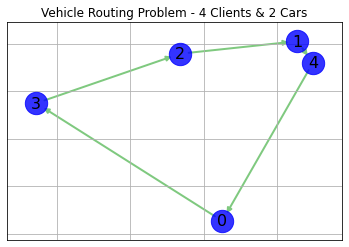

APS - Optimized Cost: 76.38973374979105




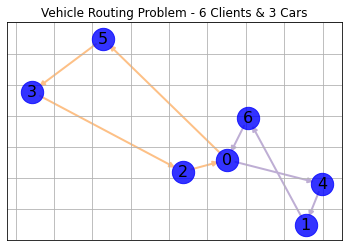

APS - Optimized Cost: 49.65162433456862




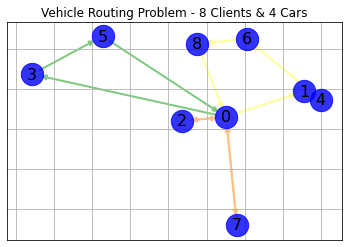

APS - Optimized Cost: 158.9921202530386




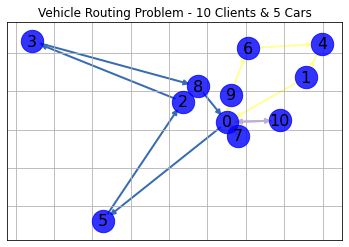

APS - Optimized Cost: 163.47502678027377




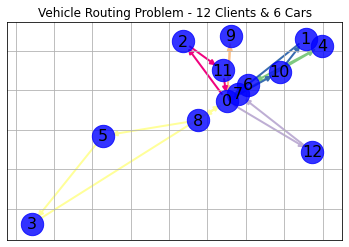

APS - Optimized Cost: 202.49724321439862




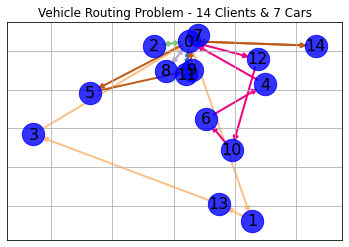

APS - Optimized Cost: 319.72818410396576




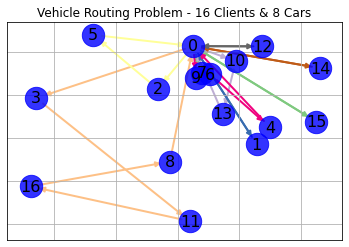

APS - Optimized Cost: 403.0033708345145




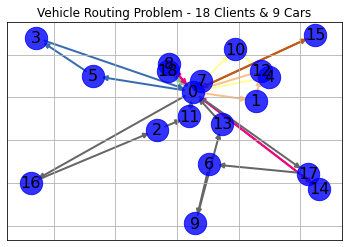

APS - Optimized Cost: 350.2616935316473




In [ ]:
vrp_list = []
for m in range(2,10,1):
    n = 2*m 
    instance, xc, yc = utility.generate_vrp_instance(n, seed)
    vrp = AveragePartitionSolver(n, m, instance)
    vrp.solve(solver='leap')
    vrp_list.append(vrp)
    vrp.visualize(xc, yc)
    print(f'APS - Optimized Cost: {vrp.evaluate_vrp_cost()}')
    print('\n')

##QUBO Build Times:

In [ ]:
for vrp in vrp_list:
    print(vrp.timing['qubo_build_time'])

114053.01094055176
285159.8262786865
615907.9074859619
1232876.5392303467
1975155.1151275635
2996144.5331573486
4517871.856689453
6216656.20803833


## D-Wave QPU Access Times:

In [ ]:
for vrp in vrp_list:
    print(vrp.timing['qpu_access_time'])

64571
54475
31173
33417
32905
32901
33405
32905


##Plots for QUBO Build Times:

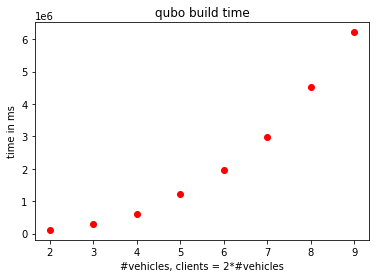

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,10), [y.timing['qubo_build_time'] for y in vrp_list], 'ro')
plt.title('qubo build time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


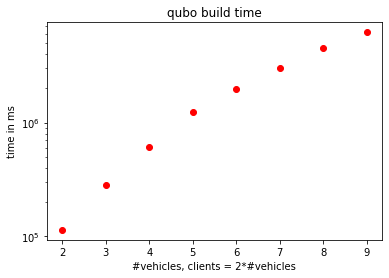

In [ ]:
print('using logarithmic scale')
plt.plot(range(2,10), [y.timing['qubo_build_time'] for y in vrp_list], 'ro')
plt.yscale("log")
plt.title('qubo build time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

##Plots for QPU Access Times:

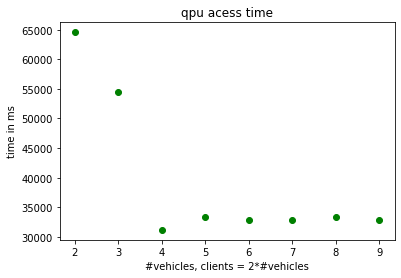

In [ ]:
plt.plot(range(2,10), [y.timing['qpu_access_time'] for y in vrp_list], 'go')
plt.title('qpu acess time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


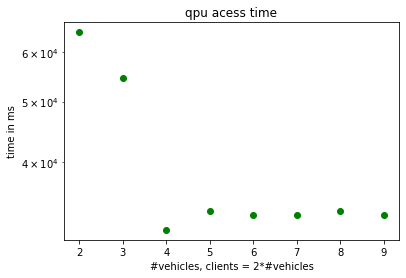

In [ ]:
print('using logarithmic scale')
plt.plot(range(2,10), [y.timing['qpu_access_time'] for y in vrp_list], 'go')
plt.yscale("log")
plt.title('qpu acess time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

##Plots for Total Times:

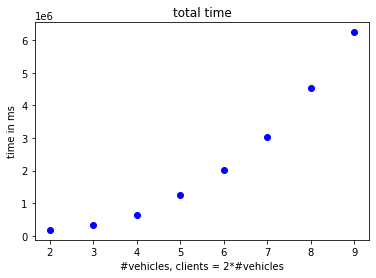

In [ ]:
total_time = []
for y in vrp_list:
    t = (y.timing['qpu_access_time'] + y.timing['qubo_build_time'])
    total_time.append(t)


plt.plot(range(2,10), total_time, 'bo')
plt.title('total time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


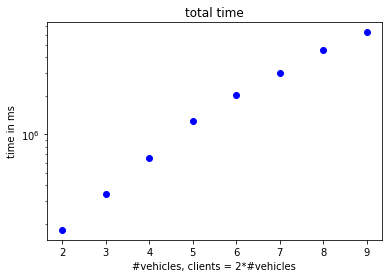

In [ ]:
print('using logarithmic scale')
plt.yscale("log")
plt.plot(range(2,10), total_time, 'bo')
plt.title('total time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()